In [62]:
import matplotlib
from mpl_toolkits import mplot3d
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [63]:
path=os.environ["userprofile"]+"\\"+".atom"+"\\"+"database.csv"
print(path)

C:\Users\657432343536\.atom\database.csv


In [64]:
data = pd.read_csv(path)
print(data)

c:\users\657432343536\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   

          State  Year      Month  Incid

In [65]:
mean_value = data['Year'].mean()
std_value = data['Year'].std()

In [66]:
K1 = 3
lower_boundary = data['Year'].mean() - (K1 * data['Year'].std())
upper_boundary = data['Year'].mean() + (K1 * data['Year'].std())

In [67]:
 # Флаги для удаления выбросов
outliers_temp = np.where(data['Year'] > upper_boundary, True, np.where(data['Year']< lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data['Year'].loc[~(outliers_temp),]

In [68]:
data_trimmed=data_trimmed
data_trimmed.name='Year'
print(data_trimmed)

0         1980
1         1980
2         1980
3         1980
4         1980
          ... 
638449    2014
638450    2014
638451    2014
638452    2014
638453    2014
Name: Year, Length: 638454, dtype: int64


C:\Users\657432343536\AppData\Local\Temp\ipykernel_3900\1247431704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_trimmed, hist=True, kde=False, rug=False )


<AxesSubplot:xlabel='Year'>

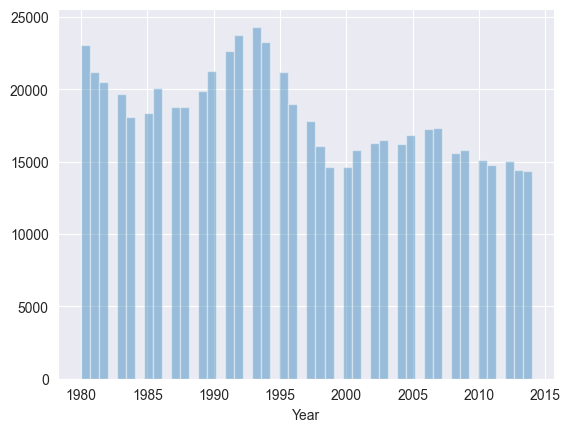

In [69]:
sns.distplot(data_trimmed, hist=True, kde=False, rug=False )

In [70]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [71]:
DF=pd.DataFrame(data=[data_trimmed,data['Incident'][:500]])

In [72]:
print(data_trimmed[:500])

0      1980
1      1980
2      1980
3      1980
4      1980
       ... 
495    1980
496    1980
497    1980
498    1980
499    1980
Name: Year, Length: 500, dtype: int64


KeyError: 'Year'

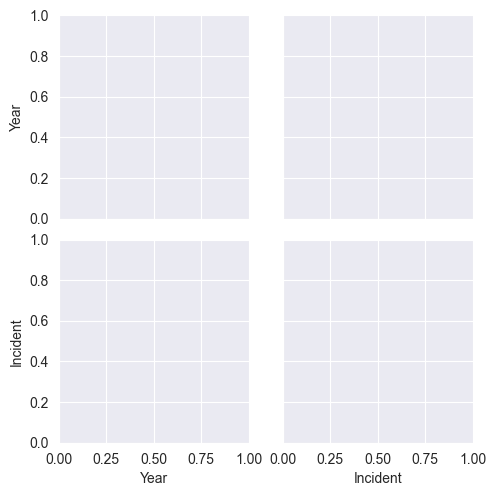

In [73]:
sns.pairplot(DF, vars=['Year', 'Incident'], diag_kind='kde')

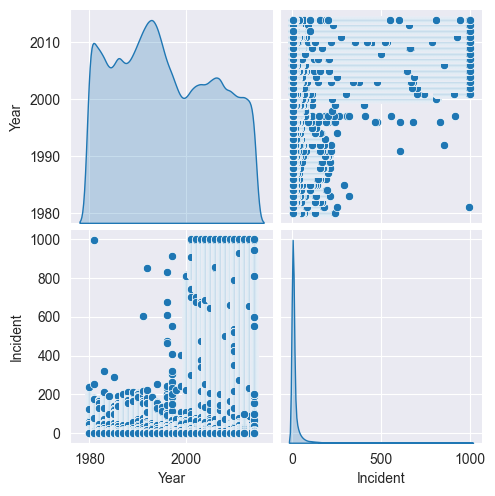

In [74]:
sns.pairplot(data, vars=['Year', 'Incident'][:500], diag_kind='kde')

In [ ]:
data.to_csv('file_with_replaced_outliers.csv', index=False)